<a href="https://colab.research.google.com/github/aashicdac/linux_assignment_1/blob/main/sbi_stock_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os       #importing os to set environment variable
def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null      #install openjdk
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     #set environment variable
  !java -version       #check java version
install_java()

!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

E: Failed to fetch http://security.ubuntu.com/ubuntu/pool/universe/o/openjdk-8/openjdk-8-jre-headless_8u462-ga%7eus1-0ubuntu2%7e22.04.2_amd64.deb  404  Not Found [IP: 91.189.92.22 80]
E: Failed to fetch http://security.ubuntu.com/ubuntu/pool/universe/o/openjdk-8/openjdk-8-jdk-headless_8u462-ga%7eus1-0ubuntu2%7e22.04.2_amd64.deb  404  Not Found [IP: 91.189.92.22 80]
E: Unable to fetch some archives, maybe run apt-get update or try with --fix-missing?
openjdk version "17.0.16" 2025-07-15
OpenJDK Runtime Environment (build 17.0.16+8-Ubuntu-0ubuntu122.04.1)
OpenJDK 64-Bit Server VM (build 17.0.16+8-Ubuntu-0ubuntu122.04.1, mixed mode, sharing)
Hit:1 https://cli.github.com/packages stable InRelease
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:5 http://archive.ubuntu.com/ubunt

In [4]:
pip install pyspark

In [5]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *

In [6]:
spark = SparkSession\
.builder.appName("SBIIN").getOrCreate()

In [7]:
sc=spark.sparkContext

In [8]:
df=spark.read.csv("/content/drive/MyDrive/SBIN.csv",header=True,inferSchema=True) # Read Excel with pyspark

In [9]:
# Quick check
df.printSchema()

root
 |-- Price: string (nullable = true)
 |-- Adj Close: string (nullable = true)
 |-- Close: string (nullable = true)
 |-- High: string (nullable = true)
 |-- Low: string (nullable = true)
 |-- Open: string (nullable = true)
 |-- Volume: string (nullable = true)



In [10]:
# to check first five rows
#df.show(5)
df.show(5,truncate=False) #truncate the onger strings 20 with ....

+-------------------------+------------------+------------------+------------------+------------------+------------------+--------+
|Price                    |Adj Close         |Close             |High              |Low               |Open              |Volume  |
+-------------------------+------------------+------------------+------------------+------------------+------------------+--------+
|Ticker                   |SBIN.NS           |SBIN.NS           |SBIN.NS           |SBIN.NS           |SBIN.NS           |SBIN.NS |
|Date                     |NULL              |NULL              |NULL              |NULL              |NULL              |NULL    |
|1996-01-01 00:00:00+00:00|12.205256462097168|18.823240280151367|18.97892189025879 |18.540184020996094|18.691146850585938|43733533|
|1996-01-02 00:00:00+00:00|11.816766738891602|18.224105834960938|18.964767456054688|17.738191604614258|18.894004821777344|56167280|
|1996-01-03 00:00:00+00:00|11.501693725585938|17.738191604614258|18.56848907

In [11]:
#filter rows on the basis of columns based on the condition
filtered=df.filter((col ("price") != "Ticker")  &
(col ("price") != "Date"))

In [12]:
filtered.show(5,truncate=False)

+-------------------------+------------------+------------------+------------------+------------------+------------------+--------+
|Price                    |Adj Close         |Close             |High              |Low               |Open              |Volume  |
+-------------------------+------------------+------------------+------------------+------------------+------------------+--------+
|1996-01-01 00:00:00+00:00|12.205256462097168|18.823240280151367|18.97892189025879 |18.540184020996094|18.691146850585938|43733533|
|1996-01-02 00:00:00+00:00|11.816766738891602|18.224105834960938|18.964767456054688|17.738191604614258|18.894004821777344|56167280|
|1996-01-03 00:00:00+00:00|11.501693725585938|17.738191604614258|18.56848907470703 |17.64383888244629 |18.327892303466797|68296318|
|1996-01-04 00:00:00+00:00|11.461926460266113|17.676862716674805|17.832542419433594|17.22397232055664 |17.50231170654297 |86073880|
|1996-01-05 00:00:00+00:00|11.397688865661621|17.57779312133789 |17.78536605

In [13]:
final_df=filtered.withColumnRenamed("Price","Date").withColumnRenamed("Adj close","Adj_close") #renaming price as date and adj close as adj_close
final_df.show(5)

+--------------------+------------------+------------------+------------------+------------------+------------------+--------+
|                Date|         Adj_close|             Close|              High|               Low|              Open|  Volume|
+--------------------+------------------+------------------+------------------+------------------+------------------+--------+
|1996-01-01 00:00:...|12.205256462097168|18.823240280151367| 18.97892189025879|18.540184020996094|18.691146850585938|43733533|
|1996-01-02 00:00:...|11.816766738891602|18.224105834960938|18.964767456054688|17.738191604614258|18.894004821777344|56167280|
|1996-01-03 00:00:...|11.501693725585938|17.738191604614258| 18.56848907470703| 17.64383888244629|18.327892303466797|68296318|
|1996-01-04 00:00:...|11.461926460266113|17.676862716674805|17.832542419433594| 17.22397232055664| 17.50231170654297|86073880|
|1996-01-05 00:00:...|11.397688865661621| 17.57779312133789| 17.78536605834961| 17.45985221862793|17.7381916046

In [14]:
check = df.filter(col("Price") == "Ticker")
check.show()

+------+---------+-------+-------+-------+-------+-------+
| Price|Adj Close|  Close|   High|    Low|   Open| Volume|
+------+---------+-------+-------+-------+-------+-------+
|Ticker|  SBIN.NS|SBIN.NS|SBIN.NS|SBIN.NS|SBIN.NS|SBIN.NS|
+------+---------+-------+-------+-------+-------+-------+



In [15]:
final_df.printSchema()

root
 |-- Date: string (nullable = true)
 |-- Adj_close: string (nullable = true)
 |-- Close: string (nullable = true)
 |-- High: string (nullable = true)
 |-- Low: string (nullable = true)
 |-- Open: string (nullable = true)
 |-- Volume: string (nullable = true)



In [17]:
final_df=filtered.withColumnRenamed("Price","Date").withColumnRenamed("Adj close","Adj_close") #renaming price as date and adj close as adj_close
final_df.show(5)

+--------------------+------------------+------------------+------------------+------------------+------------------+--------+
|                Date|         Adj_close|             Close|              High|               Low|              Open|  Volume|
+--------------------+------------------+------------------+------------------+------------------+------------------+--------+
|1996-01-01 00:00:...|12.205256462097168|18.823240280151367| 18.97892189025879|18.540184020996094|18.691146850585938|43733533|
|1996-01-02 00:00:...|11.816766738891602|18.224105834960938|18.964767456054688|17.738191604614258|18.894004821777344|56167280|
|1996-01-03 00:00:...|11.501693725585938|17.738191604614258| 18.56848907470703| 17.64383888244629|18.327892303466797|68296318|
|1996-01-04 00:00:...|11.461926460266113|17.676862716674805|17.832542419433594| 17.22397232055664| 17.50231170654297|86073880|
|1996-01-05 00:00:...|11.397688865661621| 17.57779312133789| 17.78536605834961| 17.45985221862793|17.7381916046

In [18]:
final_df.printSchema()

root
 |-- Date: string (nullable = true)
 |-- Adj_close: string (nullable = true)
 |-- Close: string (nullable = true)
 |-- High: string (nullable = true)
 |-- Low: string (nullable = true)
 |-- Open: string (nullable = true)
 |-- Volume: string (nullable = true)



In [21]:
final_df.describe().show()

+-------+--------------------+------------------+------------------+------------------+------------------+------------------+--------------------+
|summary|                Date|         Adj_close|             Close|              High|               Low|              Open|              Volume|
+-------+--------------------+------------------+------------------+------------------+------------------+------------------+--------------------+
|  count|                7252|              7252|              7252|              7252|              7252|              7252|                7252|
|   mean|                NULL|179.75648101653042| 196.5913258231416|199.39576767152406|193.97777824354515|196.84222609603594| 3.096041367264203E7|
| stddev|                NULL|179.79647273668536|182.13917558020503|184.11894750750503|180.22902900952727|182.31506605941632|3.4293410386775576E7|
|    min|1996-01-01 00:00:...|10.017285346984863|100.04151153564453|100.10755920410156| 100.0132064819336| 100.0132064

In [22]:
final_df.createOrReplaceTempView('sbi_stock')

In [24]:
# Computing Null Values in each Column
spark.sql('''
      select
        sum(case when Date is null then 1 else 0 end) as Date_NullCount,
        sum(case when Adj_Close is null then 1 else 0 end) as Adj_Close_NullCount,
        sum(case when Close is null then 1 else 0 end) as Close_NullCount,
        sum(case when Open is null then 1 else 0 end) as Open_NullCount,
        sum(case when High is null then 1 else 0 end) as High_NullCount,
        sum(case when Volume is null then 1 else 0 end) as Volume_NullCount
      from sbi_stock
''').show()

+--------------+-------------------+---------------+--------------+--------------+----------------+
|Date_NullCount|Adj_Close_NullCount|Close_NullCount|Open_NullCount|High_NullCount|Volume_NullCount|
+--------------+-------------------+---------------+--------------+--------------+----------------+
|             0|                  0|              0|             0|             0|               0|
+--------------+-------------------+---------------+--------------+--------------+----------------+



In [30]:
spark.sql('''select max(close) as maximum_close, min(close) as minimum_close, avg(close) as average_close,  stddev(close) as standard_deviation from sbi_stock
''').show()

+-----------------+------------------+-----------------+------------------+
|    maximum_close|     minimum_close|    average_close|standard_deviation|
+-----------------+------------------+-----------------+------------------+
|99.84337615966797|100.04151153564453|196.5913258231416|182.13917558020503|
+-----------------+------------------+-----------------+------------------+



#Quality Checks





In [33]:
#1 Check for Duplicates
# spark.sql("""
#     select Date,Close,High,Low,Open,Volume,count(*) as count from itc_stock group by Date,Close,High,Low,Open,Volume having count(*) > 2
# """).show()
duplicate_count = final_df.count() - final_df.dropDuplicates().count()

print(f'count of duplicate rows are {duplicate_count}')

count of duplicate rows are 0


In [ ]:
#2 Data Consistency - Checking Dates are in a sequence (No Gaps)

q_consistency = spark.sql("""
    select distinct(Date)
    from itc_stock
    order by Date
""")

print(q_consistency.count())
q_consistency.show(10)

#Phase 2: Data Cleaning and Preparation


###Handling Missing Values

In [34]:
#1 Drop Rows with missing Values in Essential Columns

df_cleaned = final_df.dropna(subset=['Date','Close','Volume'])
df_cleaned.count()

7252

###Convert Data Types

In [35]:
#2 Changing data types of dataframe
df_cleaned.printSchema()

root
 |-- Date: string (nullable = true)
 |-- Adj_close: string (nullable = true)
 |-- Close: string (nullable = true)
 |-- High: string (nullable = true)
 |-- Low: string (nullable = true)
 |-- Open: string (nullable = true)
 |-- Volume: string (nullable = true)



In [36]:
df_cleaned = df_cleaned.withColumn('Date', to_date("Date")).withColumn('Adj_Close', col('Adj_Close').cast("double")).withColumn('Close', col('Close').cast("double")).withColumn('High', col('High').cast("double")).withColumn('Low', col('Low').cast("double")).withColumn('Open', col('Open').cast("double")).withColumn('Volume', col('Volume').cast("int"))

In [37]:
df_cleaned.printSchema()
df_cleaned.show(10,truncate=False)

root
 |-- Date: date (nullable = true)
 |-- Adj_Close: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Open: double (nullable = true)
 |-- Volume: integer (nullable = true)

+----------+------------------+------------------+------------------+------------------+------------------+---------+
|Date      |Adj_Close         |Close             |High              |Low               |Open              |Volume   |
+----------+------------------+------------------+------------------+------------------+------------------+---------+
|1996-01-01|12.205256462097168|18.823240280151367|18.97892189025879 |18.540184020996094|18.691146850585938|43733533 |
|1996-01-02|11.816766738891602|18.224105834960938|18.964767456054688|17.738191604614258|18.894004821777344|56167280 |
|1996-01-03|11.501693725585938|17.738191604614258|18.56848907470703 |17.64383888244629 |18.327892303466797|68296318 |
|1996-01-04|11.4619264602661

###New Columns for Analysis

In [38]:
#1 Calculating Daily Returns
# df_cleaned = spark.sql("""
#     select *,
#       lag(Close, 1) over (order by Date) as Prev_Close,
#       ((Close - Prev_Close)/(Prev_Close) * 100) as Daily_Return
#     from itc_stock
# """)

# df_cleaned.show(10)


#Using DataFrame Operations
from pyspark.sql.window import *

window_partition = Window.orderBy("Date")

df_cleaned = df_cleaned.withColumn("Prev_Close", lag("Close").over(window_partition)).withColumn("Daily_Return", ((col("Close") - col("Prev_Close"))/col('Prev_Close')) * 100)

df_cleaned.show(10)

+----------+------------------+------------------+------------------+------------------+------------------+---------+------------------+-------------------+
|      Date|         Adj_Close|             Close|              High|               Low|              Open|   Volume|        Prev_Close|       Daily_Return|
+----------+------------------+------------------+------------------+------------------+------------------+---------+------------------+-------------------+
|1996-01-01|12.205256462097168|18.823240280151367| 18.97892189025879|18.540184020996094|18.691146850585938| 43733533|              NULL|               NULL|
|1996-01-02|11.816766738891602|18.224105834960938|18.964767456054688|17.738191604614258|18.894004821777344| 56167280|18.823240280151367| -3.182950630568117|
|1996-01-03|11.501693725585938|17.738191604614258| 18.56848907470703| 17.64383888244629|18.327892303466797| 68296318|18.224105834960938|-2.6663268680897736|
|1996-01-04|11.461926460266113|17.676862716674805|17.83254

In [39]:
#2 Calculating Moving Averages

# Not a better approach to go with spark.sql as we have to register table after every transformation so using DataFrame operations is the better choice

# df_cleaned = spark.sql("""
#       select *,
#         avg(Close) over (order by Date rows between 49 preceding and current row) as SMA_50,

#         avg(Close) over (order by Date rows between 199 preceding and current row) as SMA_200

#       from itc_stock
# """)

#Defining Windows
window_50 = Window.orderBy("Date").rowsBetween(-49,0)
window_200 = Window.orderBy("Date").rowsBetween(-199,0)

#Calculating Moving Avgs for Close column
df_cleaned = df_cleaned.withColumn("close_MA_50", avg("Close").over(window_50))

df_cleaned = df_cleaned.withColumn("close_MA_200", avg('Close').over(window_200))


df_cleaned.show(10)

+----------+------------------+------------------+------------------+------------------+------------------+---------+------------------+-------------------+------------------+------------------+
|      Date|         Adj_Close|             Close|              High|               Low|              Open|   Volume|        Prev_Close|       Daily_Return|       close_MA_50|      close_MA_200|
+----------+------------------+------------------+------------------+------------------+------------------+---------+------------------+-------------------+------------------+------------------+
|1996-01-01|12.205256462097168|18.823240280151367| 18.97892189025879|18.540184020996094|18.691146850585938| 43733533|              NULL|               NULL|18.823240280151367|18.823240280151367|
|1996-01-02|11.816766738891602|18.224105834960938|18.964767456054688|17.738191604614258|18.894004821777344| 56167280|18.823240280151367| -3.182950630568117|18.523673057556152|18.523673057556152|
|1996-01-03|11.5016937255

In [40]:
df_cleaned = df_cleaned.drop("Prev_Close")
df_cleaned.show(10)

+----------+------------------+------------------+------------------+------------------+------------------+---------+-------------------+------------------+------------------+
|      Date|         Adj_Close|             Close|              High|               Low|              Open|   Volume|       Daily_Return|       close_MA_50|      close_MA_200|
+----------+------------------+------------------+------------------+------------------+------------------+---------+-------------------+------------------+------------------+
|1996-01-01|12.205256462097168|18.823240280151367| 18.97892189025879|18.540184020996094|18.691146850585938| 43733533|               NULL|18.823240280151367|18.823240280151367|
|1996-01-02|11.816766738891602|18.224105834960938|18.964767456054688|17.738191604614258|18.894004821777344| 56167280| -3.182950630568117|18.523673057556152|18.523673057556152|
|1996-01-03|11.501693725585938|17.738191604614258| 18.56848907470703| 17.64383888244629|18.327892303466797| 68296318|-2.

###Final Data Validation

In [41]:
df_cleaned.printSchema()

root
 |-- Date: date (nullable = true)
 |-- Adj_Close: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Open: double (nullable = true)
 |-- Volume: integer (nullable = true)
 |-- Daily_Return: double (nullable = true)
 |-- close_MA_50: double (nullable = true)
 |-- close_MA_200: double (nullable = true)



In [42]:
df_cleaned.show(5, truncate = False)

+----------+------------------+------------------+------------------+------------------+------------------+--------+-------------------+------------------+------------------+
|Date      |Adj_Close         |Close             |High              |Low               |Open              |Volume  |Daily_Return       |close_MA_50       |close_MA_200      |
+----------+------------------+------------------+------------------+------------------+------------------+--------+-------------------+------------------+------------------+
|1996-01-01|12.205256462097168|18.823240280151367|18.97892189025879 |18.540184020996094|18.691146850585938|43733533|NULL               |18.823240280151367|18.823240280151367|
|1996-01-02|11.816766738891602|18.224105834960938|18.964767456054688|17.738191604614258|18.894004821777344|56167280|-3.182950630568117 |18.523673057556152|18.523673057556152|
|1996-01-03|11.501693725585938|17.738191604614258|18.56848907470703 |17.64383888244629 |18.327892303466797|68296318|-2.666326

#Phase 3: Exploratory Data Analysis(EDA)

###Summary Statistics



In [45]:
df_cleaned.describe().show()
#df_cleaned.describe(["Open","High","Low","Close","Volume", "Daily_Return"]).show()

+-------+------------------+------------------+------------------+------------------+------------------+--------------------+-------------------+------------------+------------------+
|summary|         Adj_Close|             Close|              High|               Low|              Open|              Volume|       Daily_Return|       close_MA_50|      close_MA_200|
+-------+------------------+------------------+------------------+------------------+------------------+--------------------+-------------------+------------------+------------------+
|  count|              7252|              7252|              7252|              7252|              7252|                7252|               7251|              7252|              7252|
|   mean|179.75648101653042| 196.5913258231416|199.39576767152406|193.97777824354515|196.84222609603594| 3.096041367264203E7|0.07957337967266967|193.90828623564033|185.70934354066344|
| stddev|179.79647273668536|182.13917558020503|184.11894750750503|180.2290290095

In [50]:
df_cleaned.createOrReplaceTempView("cleaned_sbi_stock")
spark.sql('''select * from  cleaned_sbi_stock limit 5''').show()


+----------+------------------+------------------+------------------+------------------+------------------+--------+-------------------+------------------+------------------+
|      Date|         Adj_Close|             Close|              High|               Low|              Open|  Volume|       Daily_Return|       close_MA_50|      close_MA_200|
+----------+------------------+------------------+------------------+------------------+------------------+--------+-------------------+------------------+------------------+
|1996-01-01|12.205256462097168|18.823240280151367| 18.97892189025879|18.540184020996094|18.691146850585938|43733533|               NULL|18.823240280151367|18.823240280151367|
|1996-01-02|11.816766738891602|18.224105834960938|18.964767456054688|17.738191604614258|18.894004821777344|56167280| -3.182950630568117|18.523673057556152|18.523673057556152|
|1996-01-03|11.501693725585938|17.738191604614258| 18.56848907470703| 17.64383888244629|18.327892303466797|68296318|-2.666326

###Analyzing Daily Returns

In [51]:
df_cleaned.describe(['Daily_Return']).show()

+-------+-------------------+
|summary|       Daily_Return|
+-------+-------------------+
|  count|               7251|
|   mean|0.07957337967266967|
| stddev| 2.3630010062122535|
|    min|-14.404020172298877|
|    max|  27.68716753514934|
+-------+-------------------+



###Trend Analysis with Moving Averages

In [53]:
#1 Calculate Rolling Averages

df_final = df_cleaned.withColumn('Trend',when(col('close_MA_50')>col('close_MA_200'),'Uptrend').otherwise('Downtrend')
)

df_final.show(10,truncate=False)

+----------+------------------+------------------+------------------+------------------+------------------+---------+-------------------+------------------+------------------+---------+
|Date      |Adj_Close         |Close             |High              |Low               |Open              |Volume   |Daily_Return       |close_MA_50       |close_MA_200      |Trend    |
+----------+------------------+------------------+------------------+------------------+------------------+---------+-------------------+------------------+------------------+---------+
|1996-01-01|12.205256462097168|18.823240280151367|18.97892189025879 |18.540184020996094|18.691146850585938|43733533 |NULL               |18.823240280151367|18.823240280151367|Downtrend|
|1996-01-02|11.816766738891602|18.224105834960938|18.964767456054688|17.738191604614258|18.894004821777344|56167280 |-3.182950630568117 |18.523673057556152|18.523673057556152|Downtrend|
|1996-01-03|11.501693725585938|17.738191604614258|18.56848907470703 |1

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [55]:
trend_counts_pyspark = df_final.groupBy("Trend").count()

trend_counts_pd = trend_counts_pyspark.toPandas()

In [56]:
print(trend_counts_pd)

       Trend  count
0  Downtrend   2710
1    Uptrend   4542


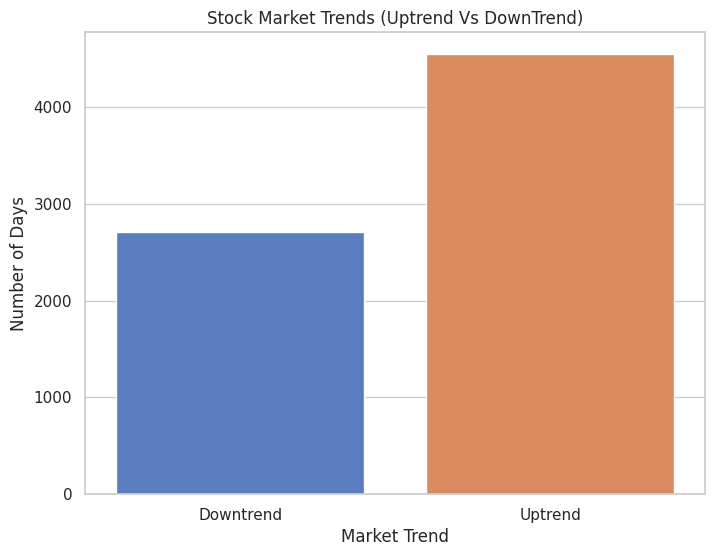

In [57]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(8, 6))

sns.barplot(x='Trend', y='count', data=trend_counts_pd, palette='muted', hue='Trend')

plt.title('Stock Market Trends (Uptrend Vs DownTrend)')
plt.xlabel('Market Trend')
plt.ylabel('Number of Days')

plt.show()

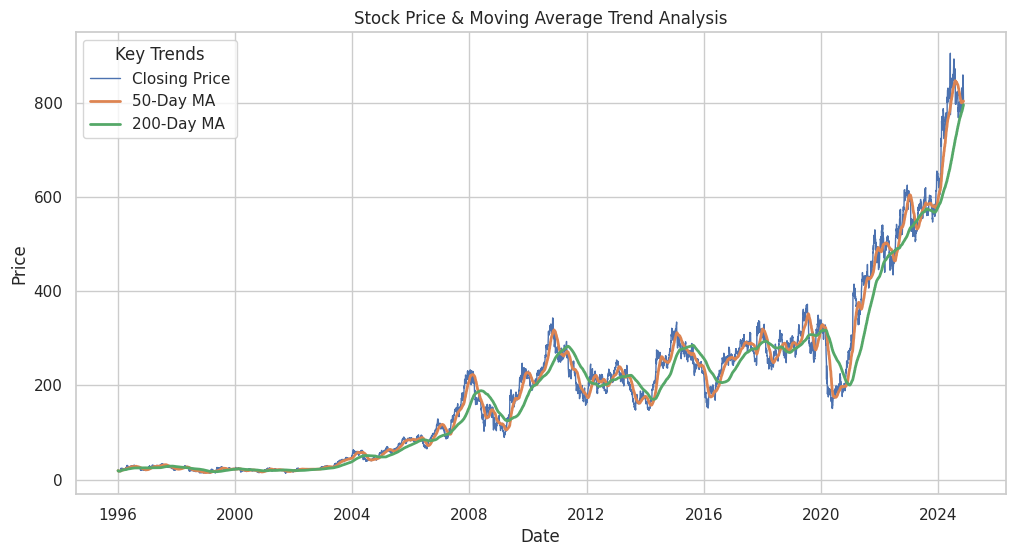

In [58]:

df_plot_Trend = df_final.select('Date', 'Close', 'close_MA_50', 'close_MA_200').toPandas()

sns.set_theme(style='whitegrid')
plt.figure(figsize=(12,6))

#Plotting Closing Price
sns.lineplot(x='Date', y='Close', data=df_plot_Trend, label='Closing Price', linewidth=1)

#Plotting Moving Avgs
sns.lineplot(x='Date', y='close_MA_50', data=df_plot_Trend, label='50-Day MA', linewidth=2)
sns.lineplot(x='Date', y='close_MA_200', data=df_plot_Trend, label='200-Day MA', linewidth=2)

plt.title('Stock Price & Moving Average Trend Analysis')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(title='Key Trends', loc='upper left')
plt.show()


In [59]:
df_vol_trends = df_final.select('Date', 'Volume', 'Close', 'Daily_Return').orderBy(desc('Volume')).limit(10)

df_vol_trends.show()

+----------+---------+------------------+-------------------+
|      Date|   Volume|             Close|       Daily_Return|
+----------+---------+------------------+-------------------+
|1996-07-04|446948261|27.739511489868164|  0.170358912907088|
|1996-07-08|408225216|29.673730850219727|  5.643266530513243|
|1996-07-09|362196026|29.423696517944336|-0.8426117145075445|
|1996-07-17|360305236|  30.2775821685791|  5.541843819985368|
|1996-07-05|346132788| 28.08861541748047| 1.2585078426482552|
|1996-06-20|310608400|28.626422882080078| 0.3970933956816745|
|1996-10-04|308807168| 21.73400115966797|-3.8806653031828287|
|1996-10-03|299422638| 22.61147689819336| -2.838024361376288|
|1996-09-19|297267413| 24.81931495666504| -2.754158264518736|
|1996-06-21|293865262|28.145225524902344|-1.6809552459974322|
+----------+---------+------------------+-------------------+



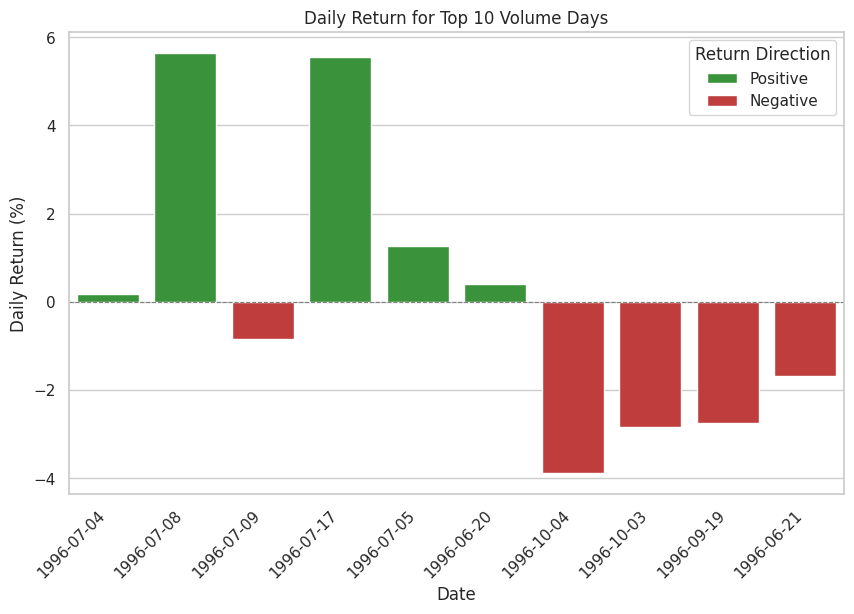

In [60]:
from matplotlib.lines import lineStyles
df_plot_vol = df_vol_trends.toPandas()
df_plot_vol['Return_Direction'] = df_plot_vol['Daily_Return'].apply(lambda x: 'Positive' if x >= 0 else 'Negative')

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.barplot(x='Date', y='Daily_Return', data = df_plot_vol, hue='Return_Direction', palette = {'Positive': '#2ca02c', 'Negative' : '#d62728'}, dodge=False, order=df_plot_vol['Date'])

plt.title('Daily Return for Top 10 Volume Days')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')

plt.xticks(rotation=45, ha='right')
plt.legend(title='Return Direction')

plt.axhline(0, color='gray', linewidth=0.8,linestyle='--')

plt.show()

###Seasonal Pattern Analysis

In [61]:
#1 Monthly Analysis
df_monthly = df_final.withColumn("Month", month('Date'))

df_monthly_trend = df_monthly.groupBy('Month').avg('Close','Volume').orderBy('Month')

df_monthly_trend.show()

+-----+------------------+--------------------+
|Month|        avg(Close)|         avg(Volume)|
+-----+------------------+--------------------+
|    1|191.32007575804187|3.1183557491935484E7|
|    2| 194.5866001659891|3.3786038711304344E7|
|    3|183.84446982391609|3.2221231847933885E7|
|    4|186.16385585059254|2.8242984347294938E7|
|    5|194.65848306897746|3.4694591455858745E7|
|    6|197.39971339238156| 3.522871081818182E7|
|    7|202.94584922909922|3.3793204392801255E7|
|    8| 200.2320049353898| 2.751225333711507E7|
|    9| 202.7540108948007|2.8480063338308457E7|
|   10|202.73078999495468|3.1245267729549248E7|
|   11| 205.0210134440455|2.9099358329310346E7|
|   12|196.96371508278324| 2.564038388704319E7|
+-----+------------------+--------------------+



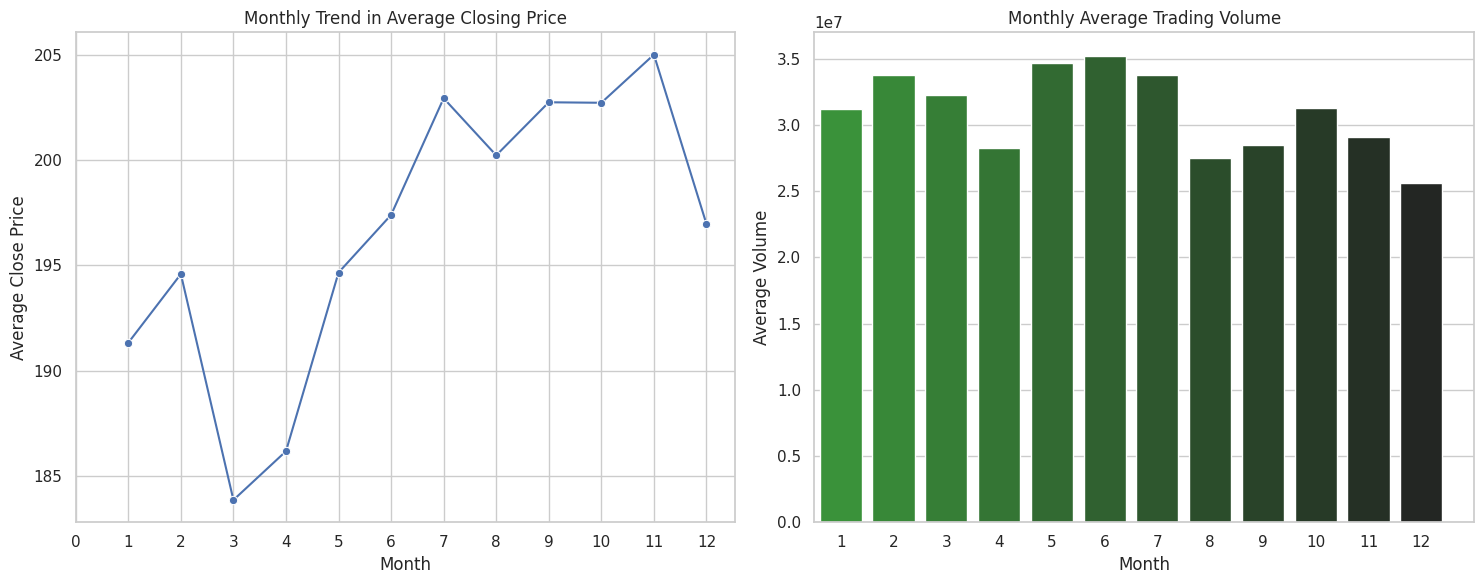

In [62]:
df_plot_monthly = df_monthly_trend.toPandas()

sns.set_theme(style='whitegrid')

fig, axes = plt.subplots(1,2,figsize=(15,6))

sns.lineplot(x='Month', y='avg(Close)', data=df_plot_monthly, marker='o', color='b', ax = axes[0])

axes[0].set_title('Monthly Trend in Average Closing Price')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Average Close Price')
axes[0].set_xticks(range(0, 13))

sns.barplot(x='Month', y='avg(Volume)', data=df_plot_monthly, palette='dark:#2ca02c_r',ax = axes[1], hue = 'Month', legend=False)

axes[1].set_title('Monthly Average Trading Volume')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Average Volume')
axes[1].set_xticks(range(0,13))

plt.tight_layout()
plt.show()

In [63]:
#2 Quarterly Analysis

df_Quarterly = df_final.withColumn("Quarter", quarter('Date'))

df_Quarterly_trend = df_Quarterly.groupBy('Quarter').avg('Close','Volume')

df_Quarterly_trend.show()

+-------+------------------+--------------------+
|Quarter|        avg(Close)|         avg(Volume)|
+-------+------------------+--------------------+
|      1|189.85091461605495|       3.236367954E7|
|      3|201.98290116842105|2.9985151215169445E7|
|      4| 201.5272810131161|2.8651911454800673E7|
|      2| 192.9041654547845| 3.283600793156733E7|
+-------+------------------+--------------------+



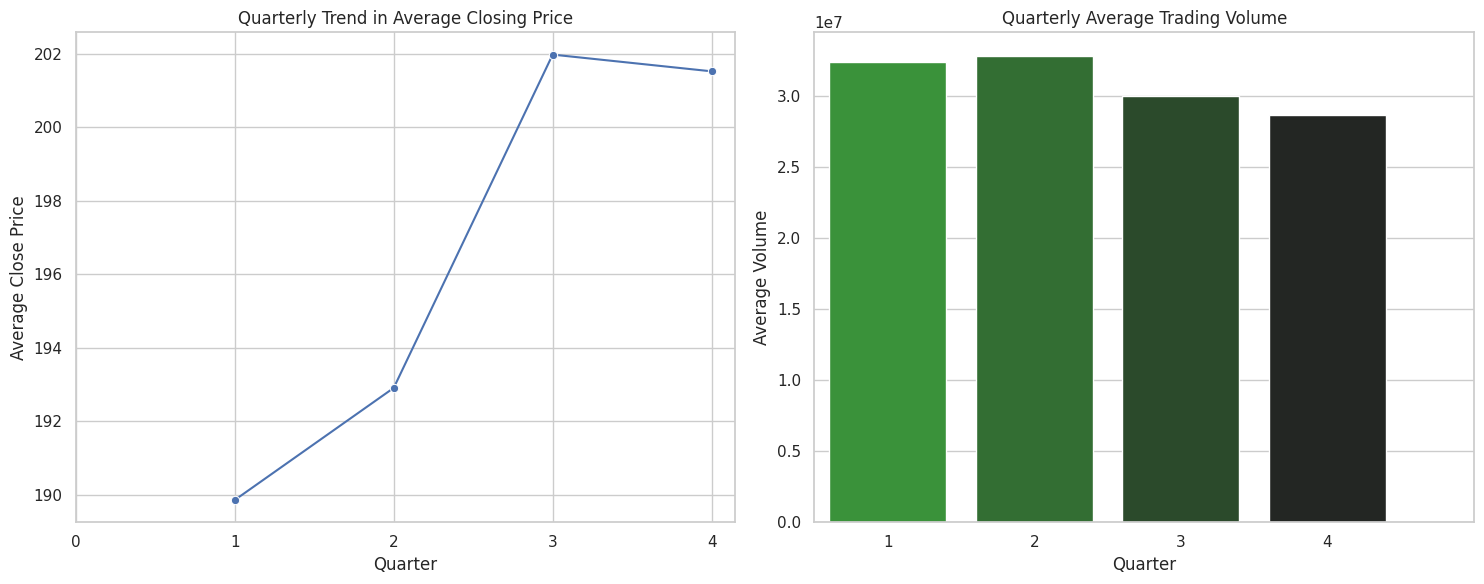

In [64]:
df_plot_quarterly = df_Quarterly_trend.toPandas()

sns.set_theme(style='whitegrid')

fig, axes = plt.subplots(1,2,figsize=(15,6))

sns.lineplot(x='Quarter', y='avg(Close)', data=df_plot_quarterly, marker='o', color='b', ax = axes[0])

axes[0].set_title('Quarterly Trend in Average Closing Price')
axes[0].set_xlabel('Quarter')
axes[0].set_ylabel('Average Close Price')
axes[0].set_xticks(range(0, 5))

sns.barplot(x='Quarter', y='avg(Volume)', data=df_plot_quarterly, palette='dark:#2ca02c_r',ax = axes[1], hue = 'Quarter', legend=False)

axes[1].set_title('Quarterly Average Trading Volume')
axes[1].set_xlabel('Quarter')
axes[1].set_ylabel('Average Volume')
axes[1].set_xticks(range(0,5))

plt.tight_layout()
plt.show()

In [65]:
df_temp = df_final.withColumn(
    'Abs_Daily_Return', abs(col('Daily_Return'))
)
df_volatile_days = df_temp.select('Date', 'Close', 'Daily_Return', 'Abs_Daily_Return').orderBy(desc('Abs_Daily_Return')).limit(10)

df_volatile_days.show()

+----------+------------------+-------------------+------------------+
|      Date|             Close|       Daily_Return|  Abs_Daily_Return|
+----------+------------------+-------------------+------------------+
|2017-10-25| 324.8999938964844|  27.68716753514934| 27.68716753514934|
|2009-05-18|157.65499877929688|  20.02663985797652| 20.02663985797652|
|2024-06-04| 775.2000122070312|-14.404020172298877|14.404020172298877|
|2004-05-14| 48.70454406738281|-14.252493004087977|14.252493004087977|
|2020-03-13|             242.0| 13.828783185532659|13.828783185532659|
|2020-03-23|181.60000610351562|-13.461996272740032|13.461996272740032|
|2004-05-17| 42.24614334106445|-13.260365844680019|13.260365844680019|
|2020-03-12|212.60000610351562|-13.259893590648847|13.259893590648847|
|2008-10-24| 116.4749984741211|-12.177192479456291|12.177192479456291|
|2016-03-02|181.14999389648438| 11.786479780951401|11.786479780951401|
+----------+------------------+-------------------+------------------+



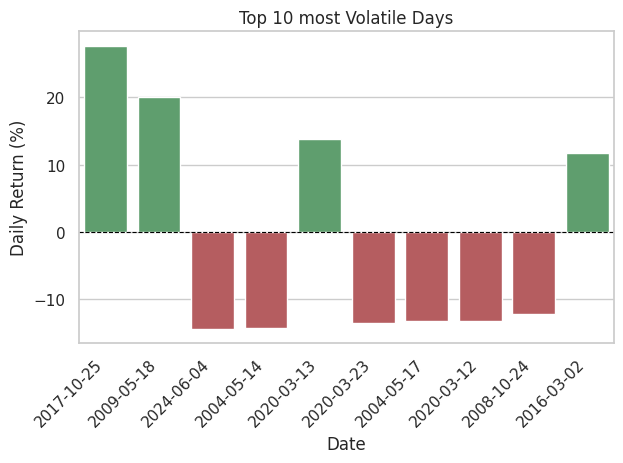

In [66]:
df_plot_volatile = df_volatile_days.toPandas()

df_plot_volatile['Return_Direction'] = df_plot_volatile['Daily_Return'].apply(lambda x : 'Positive' if x >= 0 else 'Negative')

sns.barplot(x='Date',y='Daily_Return', data=df_plot_volatile, hue='Return_Direction', palette={'Positive' : 'g', 'Negative' : 'r'}, dodge=False, order=df_plot_volatile['Date'], legend = False)

plt.title('Top 10 most Volatile Days')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.xticks(rotation=45, ha='right')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.tight_layout()
plt.show()